<a href="https://colab.research.google.com/github/LynnSynuo/Health_Insurance_Fraud_Detector/blob/main/Health_Insurance_Fraud_Detector_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.Set up environment

In [1]:
from google.colab import drive


# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/* Fraud Claim Detector/kaggle_data/

%ls -l

/content/drive/MyDrive/* Fraud Claim Detector/kaggle_data
total 120769
-rw------- 1 root root    14894 Oct 23  2019 Test-1542969243754.csv
-rw------- 1 root root  5325982 Oct 23  2019 Test_Beneficiarydata-1542969243754.csv
-rw------- 1 root root  2020712 Oct 23  2019 Test_Inpatientdata-1542969243754.csv
-rw------- 1 root root 18806934 Oct 23  2019 Test_Outpatientdata-1542969243754.csv
-rw------- 1 root root    87094 Oct 23  2019 Train-1542865627584.csv
-rw------- 1 root root 11444821 Oct 23  2019 Train_Beneficiarydata-1542865627584.csv
-rw------- 1 root root  8572555 Oct 23  2019 Train_Inpatientdata-1542865627584.csv
-rw------- 1 root root 77391090 Oct 23  2019 Train_Outpatientdata-1542865627584.csv


#2.List, Convert to DataFrame

In [3]:
# Train-1542865627584.csv

# Provider	PotentialFraud
# 0	PRV51001	No
# 1	PRV51003	Yes
# 2	PRV51004	No
# 3	PRV51005	Yes
# 4	PRV51007	No

In [4]:
# Train_Beneficiarydata-1542865627584.csv

# BeneID	DOB	DOD	Gender	Race	RenalDiseaseIndicator	State	County	NoOfMonths_PartACov	NoOfMonths_PartBCov	...	ChronicCond_Depression	ChronicCond_Diabetes	ChronicCond_IschemicHeart	ChronicCond_Osteoporasis	ChronicCond_rheumatoidarthritis	ChronicCond_stroke	IPAnnualReimbursementAmt	IPAnnualDeductibleAmt	OPAnnualReimbursementAmt	OPAnnualDeductibleAmt
# 0	BENE11001	1943-01-01	NaN	1	1	0	39	230	12	12	...	1	1	1	2	1	1	36000	3204	60	70


In [5]:
# Train_Inpatientdata-1542865627584.csv

# BeneID	ClaimID	ClaimStartDt	ClaimEndDt	Provider	InscClaimAmtReimbursed	AttendingPhysician	OperatingPhysician	OtherPhysician	AdmissionDt	...	ClmDiagnosisCode_7	ClmDiagnosisCode_8	ClmDiagnosisCode_9	ClmDiagnosisCode_10	ClmProcedureCode_1	ClmProcedureCode_2	ClmProcedureCode_3	ClmProcedureCode_4	ClmProcedureCode_5	ClmProcedureCode_6
# 0	BENE11001	CLM46614	2009-04-12	2009-04-18	PRV55912	26000	PHY390922	NaN	NaN	2009-04-12	...	2724	19889	5849	NaN	NaN	NaN	NaN	NaN	NaN	NaN


In [6]:
# Train_Outpatientdata-1542865627584.csv

# 	BeneID	ClaimID	ClaimStartDt	ClaimEndDt	Provider	InscClaimAmtReimbursed	AttendingPhysician	OperatingPhysician	OtherPhysician	ClmDiagnosisCode_1	...	ClmDiagnosisCode_9	ClmDiagnosisCode_10	ClmProcedureCode_1	ClmProcedureCode_2	ClmProcedureCode_3	ClmProcedureCode_4	ClmProcedureCode_5	ClmProcedureCode_6	DeductibleAmtPaid	ClmAdmitDiagnosisCode
# 0	BENE11002	CLM624349	2009-10-11	2009-10-11	PRV56011	30	PHY326117	NaN	NaN	78943	...	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN	0	56409


In [7]:
import os
import pandas as pd

class CSVReader:
    def __init__(self, directory):
        self.directory = directory
        self.file_list = self._get_csv_files()

    def _get_csv_files(self):
        csv_files = [file for file in os.listdir(self.directory) if file.endswith('.csv')]
        return csv_files

    def read_csv_files(self):
        dataframes = {}
        for file in self.file_list:
            file_path = os.path.join(self.directory, file)
            dataframe_name = os.path.splitext(file)[0]  # Use file name as DataFrame name
            dataframes[dataframe_name] = pd.read_csv(file_path)
        return dataframes

In [8]:
# Example usage
directory_path = "/content/drive/MyDrive/* Fraud Claim Detector/kaggle_data/"
csv_reader = CSVReader(directory_path)
dataframes = csv_reader.read_csv_files()

# Print keys of the dictionary
print("Files of the dictionary:")
for file in dataframes.keys():
    print(file)

Files of the dictionary:
Test_Inpatientdata-1542969243754
Test-1542969243754
Test_Beneficiarydata-1542969243754
Test_Outpatientdata-1542969243754
Train-1542865627584
Train_Beneficiarydata-1542865627584
Train_Inpatientdata-1542865627584
Train_Outpatientdata-1542865627584


In [9]:
# Train-1542865627584
# Train_Beneficiarydata-1542865627584
# Train_Inpatientdata-1542865627584
# Train_Outpatientdata-1542865627584


#3.Merge files

In [10]:
import pandas as pd

class DataMerger:
    def __init__(self, beneficiary_file, inpatient_file, target_file):
        self.beneficiary_file = beneficiary_file
        self.inpatient_file = inpatient_file
        self.target_file = target_file

    def merge_dataframes(self):
        # Read CSV files into DataFrames
        df_beneficiary = pd.read_csv(self.beneficiary_file)
        df_inpatient = pd.read_csv(self.inpatient_file)
        df_target = pd.read_csv(self.target_file)

        # Merge df_beneficiary and df_inpatient based on 'BeneID'
        merged_df1 = pd.merge(df_beneficiary, df_inpatient, on='BeneID', how='right')

        # Merge merged_df1 with df_target based on 'Provider'
        merged_df2 = pd.merge(merged_df1, df_target, on='Provider', how='left')

        return merged_df2

In [11]:
# Example usage
beneficiary_file = "/content/drive/MyDrive/* Fraud Claim Detector/kaggle_data/Train_Beneficiarydata-1542865627584.csv"
inpatient_file = "/content/drive/MyDrive/* Fraud Claim Detector/kaggle_data/Train_Inpatientdata-1542865627584.csv"
target_file = "/content/drive/MyDrive/* Fraud Claim Detector/kaggle_data/Train-1542865627584.csv"

data_merger = DataMerger(beneficiary_file, inpatient_file, target_file)
merged_df_IP = data_merger.merge_dataframes()

# # Display the merged DataFrame
# print("Merged DataFrame:")
# print(merged_df_IP.info())

merged_df_IP.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40474 entries, 0 to 40473
Data columns (total 55 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   BeneID                           40474 non-null  object 
 1   DOB                              40474 non-null  object 
 2   DOD                              318 non-null    object 
 3   Gender                           40474 non-null  int64  
 4   Race                             40474 non-null  int64  
 5   RenalDiseaseIndicator            40474 non-null  object 
 6   State                            40474 non-null  int64  
 7   County                           40474 non-null  int64  
 8   NoOfMonths_PartACov              40474 non-null  int64  
 9   NoOfMonths_PartBCov              40474 non-null  int64  
 10  ChronicCond_Alzheimer            40474 non-null  int64  
 11  ChronicCond_Heartfailure         40474 non-null  int64  
 12  ChronicCond_Kidney

In [12]:
# Example usage
beneficiary_file = "/content/drive/MyDrive/* Fraud Claim Detector/kaggle_data/Train_Beneficiarydata-1542865627584.csv"
outpatient_file = "/content/drive/MyDrive/* Fraud Claim Detector/kaggle_data/Train_Outpatientdata-1542865627584.csv"
target_file = "/content/drive/MyDrive/* Fraud Claim Detector/kaggle_data/Train-1542865627584.csv"

data_merger = DataMerger(beneficiary_file, outpatient_file, target_file)
merged_df_OP = data_merger.merge_dataframes()

# # Display the merged DataFrame
# print("Merged DataFrame:")
# print(merged_df_OP.info())

merged_df_OP

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,PotentialFraud
0,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409,Yes
1,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380,No
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,No
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,Yes
4,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517732,BENE159198,1952-04-01,NaN,2,1,0,21,20,12,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,No
517733,BENE159198,1952-04-01,NaN,2,1,0,21,20,12,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,No
517734,BENE159198,1952-04-01,NaN,2,1,0,21,20,12,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,No
517735,BENE159198,1952-04-01,NaN,2,1,0,21,20,12,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,No


#4.Week number and day number

##4.1 Week_num for IP

In [13]:
import pandas as pd

class WeekNumGenerator:
  def __init__(self, data):
    self.df = data.copy()

  def add_week_num(self,input_col = 'ClaimEndDt', output_col = 'week_num'):
    self.df[output_col] = pd.to_datetime(self.df[input_col]).dt.week
    return self.df


# I want to write .dt.isocalendar().week, doesn't work

In [14]:
# merged_df_IP

week_num_generator = WeekNumGenerator(merged_df_IP)
merged_df_IP = week_num_generator.add_week_num()


# week_num min: 1; max: 53

# 	ClaimEndDt	week_num
# 32342	2009-01-03	1
# 39063	2009-01-03	1
# 4003	2009-01-01	1
# 4002	2009-01-01	1
# 35209	2009-01-04	1
# ...	...	...
# 26932	2009-12-28	53
# 6752	2009-12-29	53
# 2962	2009-12-29	53
# 3434	2009-12-29	53
# 23432	2009-12-29	53




<ipython-input-13-46f2da5009fb>:8: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  self.df[output_col] = pd.to_datetime(self.df[input_col]).dt.week


In [15]:
merged_df_IP['ClmAdmitDiagnosisCode'].value_counts()

78650    1731
78605    1669
486      1438
4280     1106
7802     1018
         ... 
9679        1
3576        1
2271        1
29533       1
73316       1
Name: ClmAdmitDiagnosisCode, Length: 1928, dtype: int64

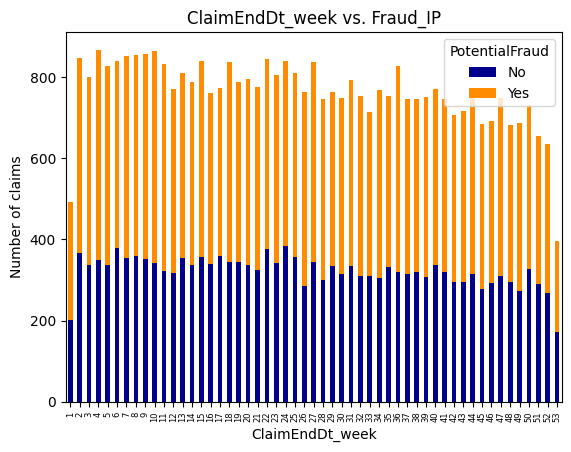

In [16]:
import matplotlib.pyplot as plt

ip_claim_week = merged_df_IP.groupby('week_num')['PotentialFraud'].value_counts().unstack()


ip_claim_week.plot(kind='bar',stacked=True, color={'No':'darkblue','Yes':'darkorange'})
plt.title('ClaimEndDt_week vs. Fraud_IP')
plt.xlabel('ClaimEndDt_week')
plt.ylabel('Number of claims')
plt.xticks(fontsize=6)
plt.show()

##4.2 Day_num for OP

In [17]:
import pandas as pd

class DayNumGenerator:
  def __init__(self, data):
    self.df = data.copy()

  def add_day_num(self,input_col = 'ClaimEndDt', output_col = 'day_num'):
    self.df[output_col] = pd.to_datetime(self.df[input_col]).dt.dayofyear # note: use dayofyear, NOT day!!
                                                                          # 'day' range from 1 to 31
                                                                          # 'dayofyear' range from 1 to 365
    return self.df

In [18]:
# merged_df_OP
day_num_generator = DayNumGenerator(merged_df_OP)
merged_df_OP = day_num_generator.add_day_num()

merged_df_OP[['ClaimEndDt','day_num']].sort_values(by='day_num')

,ClaimEndDt,day_num
45004,2009-01-01,1
60130,2009-01-01,1
97958,2009-01-01,1
278198,2009-01-01,1
326441,2009-01-01,1
...,...,...
62655,2009-12-31,365
470285,2009-12-31,365
274589,2009-12-31,365
141764,2009-12-31,365


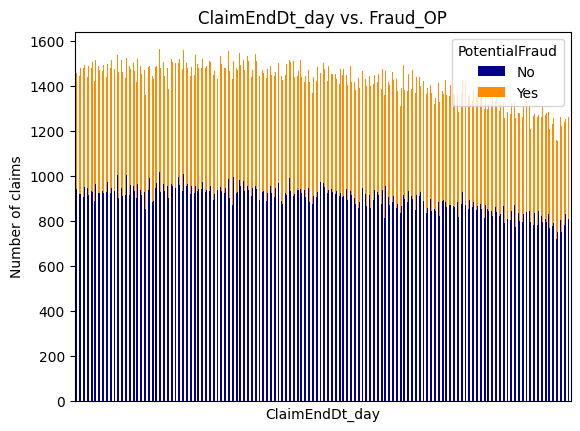

In [19]:
op_claim_week = merged_df_OP.groupby('ClaimEndDt')['PotentialFraud'].value_counts().unstack()


op_claim_week.plot(kind='bar',stacked=True, color={'No':'darkblue','Yes':'darkorange'})
plt.title('ClaimEndDt_day vs. Fraud_OP')
plt.xlabel('ClaimEndDt_day')
plt.ylabel('Number of claims')
plt.xticks([])
plt.show()

In [20]:
op_claims_per_day = merged_df_OP.groupby('ClaimEndDt')['ClaimID'].nunique()
op_claims_per_day.mean()

1414.5819672131147

#5.Train test Split
* IP_train_raw
* IP_test_raw

* OP_train_raw
* OP_test_raw

In [21]:
class DataSplitter:
  def __init__(self, data):
    self.data = data

  def extract_train_ip(self, train_start, train_end):
    self.train_raw = self.data[(self.data['week_num'] >= train_start) & (self.data['week_num'] <= train_end)].reset_index(drop = True)
    return self.train_raw

  def extract_test_ip(self, test_start, test_end):
    self.test_raw = self.data[(self.data['week_num'] >= test_start) & (self.data['week_num'] <= test_end)].reset_index(drop = True)
    return self.test_raw

  def extract_train_op(self, train_start, train_end):
    self.train_raw = self.data[(self.data['day_num'] >= train_start) & (self.data['day_num'] <= train_end)].reset_index(drop = True)
    return self.train_raw

  def extract_test_op(self, test_start, test_end):
    self.test_raw = self.data[(self.data['day_num'] >= test_start) & (self.data['day_num'] <= test_end)].reset_index(drop = True)
    return self.test_raw

# in pandas DataFrame filter, instead of using 'and', I should use '&'

In [22]:
# test class DataSplitter

# input:
# updated merged_df_IP with week_num
# updated merged_df_OP with week_num

data_splitter = DataSplitter(merged_df_IP)
IP_train_raw = data_splitter.extract_train_ip(train_start = 1, train_end = 41)
IP_test_raw = data_splitter.extract_test_ip(test_start = 42, test_end = 53)

# IP_train_raw # 32,388 rows × 56 columns
# IP_test_raw # 8,086 rows × 56 columns


In [23]:
IP_test_raw['InscClaimAmtReimbursed'].sum()

81901630

In [24]:
data_splitter = DataSplitter(merged_df_OP)
OP_train_raw = data_splitter.extract_train_op(train_start = 1, train_end = 292)
OP_test_raw = data_splitter.extract_test_op(test_start = 293, test_end = 365)

# OP_train_raw # 424,035 rows × 53 columns
# OP_test_raw # 93,702 rows × 53 columns



In [25]:
OP_test_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93702 entries, 0 to 93701
Data columns (total 53 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   BeneID                           93702 non-null  object 
 1   DOB                              93702 non-null  object 
 2   DOD                              94 non-null     object 
 3   Gender                           93702 non-null  int64  
 4   Race                             93702 non-null  int64  
 5   RenalDiseaseIndicator            93702 non-null  object 
 6   State                            93702 non-null  int64  
 7   County                           93702 non-null  int64  
 8   NoOfMonths_PartACov              93702 non-null  int64  
 9   NoOfMonths_PartBCov              93702 non-null  int64  
 10  ChronicCond_Alzheimer            93702 non-null  int64  
 11  ChronicCond_Heartfailure         93702 non-null  int64  
 12  ChronicCond_Kidney

#6.Feature engineer

##6.1 Transformer_IP

In [26]:
import pandas as pd

class Transformer_IP:
  def __init__(self, ip_data, op_data):
    self.ip_data = ip_data
    self.op_data = op_data


  def fit(self,X, y=None):
    # ClaimID_provider
    self.provider_claim_count = X.groupby('Provider')['ClaimID'].count().reset_index() # provider_claim_count is a df
    self.provider_claim_count.columns = ['ProviderID', 'ClaimID_provider']

    # State_provider
    self.provider_state_count = X.groupby('Provider')['State'].nunique().reset_index() # provider_state_count is a df
    self.provider_state_count.columns = ['ProviderID', 'State_provider']

    # AtdPhy_provider
    self.provider_AtdPhy_count = X.groupby('Provider')['AttendingPhysician'].nunique().reset_index() # provider_AtdPhy_count is a df
    self.provider_AtdPhy_count.columns = ['ProviderID', 'AtdPhy_provider']




  def transform(self, X, y=None):
    df = pd.DataFrame()

    # ClaimID
    # 'ClaimID' is NOT necessary
    # 'ProviderID' will be removed after merging
    # df['ClaimID'] = X['ClaimID']
    df['ProviderID'] = X['Provider']

    # Aggregated features
    df = pd.merge(df, self.provider_claim_count, on = 'ProviderID', how = 'left')
    df['ClaimID_provider'].fillna(1, inplace=True) # training set has NO missing data, becasue data was fitted based on training set
                                                   # test set may have missing data, this step is for test data
                                                   # it's ok to have missing data for rule based model
                                                   # however, logistic regression model requires no missing data

    df = pd.merge(df, self.provider_state_count, on = 'ProviderID', how = 'left')
    df['State_provider'].fillna(1,inplace = True)

    df = pd.merge(df, self.provider_AtdPhy_count, on = 'ProviderID', how = 'left')
    df['AtdPhy_provider'].fillna(1,inplace = True)

    # Provider_service
    # generate a ProviderService df and merge with df
    # much better than invoking method for each provider in claim data
    unique_provider_ids = pd.Series(df['ProviderID'].unique()) # input ProviderID need to be unique!!
    provider_service_df = self.classify_provider_service(unique_provider_ids)
    df = pd.merge(df, provider_service_df, on='ProviderID', how='left')

    # Other features
    df['Age'] = pd.to_datetime(X['ClaimEndDt']).dt.year - pd.to_datetime(X['DOB']).dt.year
    df['Gender'] = X['Gender']
    df['Race'] = X['Race']
    df['State'] = X['State']
    df['NoOfMonths_PartACov'] = X['NoOfMonths_PartACov']
    df['NoOfMonths_PartBCov'] = X['NoOfMonths_PartBCov']
    df['ChronicCond_Alzheimer'] = X['ChronicCond_Alzheimer']
    df['ChronicCond_Heartfailure'] = X['ChronicCond_Heartfailure']
    df['ChronicCond_KidneyDisease'] = X['ChronicCond_KidneyDisease']
    df['ChronicCond_Cancer'] = X['ChronicCond_Cancer']
    df['ChronicCond_ObstrPulmonary'] = X['ChronicCond_ObstrPulmonary']
    df['ChronicCond_Depression'] = X['ChronicCond_Depression']
    df['ChronicCond_Diabetes'] = X['ChronicCond_Diabetes']
    df['ChronicCond_IschemicHeart'] = X['ChronicCond_IschemicHeart']
    df['ChronicCond_Osteoporasis'] = X['ChronicCond_Osteoporasis']
    df['ChronicCond_rheumatoidarthritis'] = X['ChronicCond_rheumatoidarthritis']
    df['ChronicCond_stroke'] = X['ChronicCond_stroke']
    df['IPAnnualReimbursementAmt'] = X['IPAnnualReimbursementAmt']
    df['IPAnnualDeductibleAmt'] = X['IPAnnualDeductibleAmt']
    df['OPAnnualReimbursementAmt'] = X['OPAnnualReimbursementAmt']
    df['OPAnnualDeductibleAmt'] = X['OPAnnualDeductibleAmt']
    df['ClaimDuration'] = (pd.to_datetime(X['ClaimEndDt']) - pd.to_datetime(X['ClaimStartDt'])).dt.days
    df['InscClaimAmtReimbursed'] = X['InscClaimAmtReimbursed']
    df['HospitalDuration'] = (pd.to_datetime(X['DischargeDt']) - pd.to_datetime(X['AdmissionDt'])).dt.days
    df['DeductibleAmtPaid'] = X['DeductibleAmtPaid'].fillna(-1).astype(float)

    # code
    df['ClmAdmitDiagnosisCode'] = X['ClmAdmitDiagnosisCode'].str.replace('V','').str.replace('E','').astype(int)
    df['DiagnosisGroupCode'] = X['DiagnosisGroupCode'].str.replace('OTH','0').fillna(-1).astype(int)
    df['ClmDiagnosisCode_1'] = X['ClmDiagnosisCode_1'].str.replace('V','').str.replace('E','').astype(int)
    df['ClmProcedureCode_1'] = X['ClmProcedureCode_1'].fillna(-1).astype(int)  # ClmProcedureCode_1 has lots of missing data

    # remove 'ProviderID'
    # 'ProviderID' is necessary for merging df
    # need to be removed after merging
    df = df.drop('ProviderID', axis = 1)


    return df


  def fit_transform(self, X, y= None):
    self.fit(X)

    return self.transform(X)


  def classify_provider_service(self, provider_ids): # the input 'provider_ids' need to be a series
    ip_providers = set(self.ip_data['Provider'])
    op_providers = set(self.op_data['Provider'])

    ans = {'ProviderID': provider_ids}


    def classify(provider_id):
      if provider_id in ip_providers and provider_id in op_providers:
        return 2
      elif provider_id in ip_providers:
        return 1
      elif provider_id in op_providers:
        return 0
      else:
        return -1


    provider_service_series = provider_ids.apply(classify)
    ans['Provider_service'] = provider_service_series

    return pd.DataFrame(ans)


In [27]:
# IP_train_raw
# IP_test_raw
# OP_train_raw
# OP_test_raw

transformer_ip= Transformer_IP(IP_train_raw, OP_train_raw) # if __init__ have parameter, I need to provider parameters when initiate the class
IP_train_raw_num = transformer_ip.fit_transform(IP_train_raw)
IP_train_raw_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32388 entries, 0 to 32387
Data columns (total 33 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ClaimID_provider                 32388 non-null  int64  
 1   State_provider                   32388 non-null  int64  
 2   AtdPhy_provider                  32388 non-null  int64  
 3   Provider_service                 32388 non-null  int64  
 4   Age                              32388 non-null  int64  
 5   Gender                           32388 non-null  int64  
 6   Race                             32388 non-null  int64  
 7   State                            32388 non-null  int64  
 8   NoOfMonths_PartACov              32388 non-null  int64  
 9   NoOfMonths_PartBCov              32388 non-null  int64  
 10  ChronicCond_Alzheimer            32388 non-null  int64  
 11  ChronicCond_Heartfailure         32388 non-null  int64  
 12  ChronicCond_Kidney

In [28]:
IP_test_raw_num = transformer_ip.fit_transform(IP_test_raw) # when predicting with IP_test_raw, we don't call fit_transform method
IP_test_raw_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8086 entries, 0 to 8085
Data columns (total 33 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ClaimID_provider                 8086 non-null   int64  
 1   State_provider                   8086 non-null   int64  
 2   AtdPhy_provider                  8086 non-null   int64  
 3   Provider_service                 8086 non-null   int64  
 4   Age                              8086 non-null   int64  
 5   Gender                           8086 non-null   int64  
 6   Race                             8086 non-null   int64  
 7   State                            8086 non-null   int64  
 8   NoOfMonths_PartACov              8086 non-null   int64  
 9   NoOfMonths_PartBCov              8086 non-null   int64  
 10  ChronicCond_Alzheimer            8086 non-null   int64  
 11  ChronicCond_Heartfailure         8086 non-null   int64  
 12  ChronicCond_KidneyDi

##6.2 Transformer_OP

In [29]:
import pandas as pd

class Transformer_OP:
  def __init__(self, ip_data, op_data):
    self.ip_data = ip_data
    self.op_data = op_data

  def fit(self,X, y=None):
    # ClaimID_provider
    self.provider_claim_count = X.groupby('Provider')['ClaimID'].count().reset_index() # provider_claim_count is a df
    self.provider_claim_count.columns = ['ProviderID', 'ClaimID_provider']

    # State_provider
    self.provider_state_count = X.groupby('Provider')['State'].nunique().reset_index() # provider_state_count is a df
    self.provider_state_count.columns = ['ProviderID', 'State_provider']

    # AtdPhy_provider
    self.provider_AtdPhy_count = X.groupby('Provider')['AttendingPhysician'].nunique().reset_index() # provider_AtdPhy_count is a df
    self.provider_AtdPhy_count.columns = ['ProviderID', 'AtdPhy_provider']



  def transform(self, X, y=None):
    df = pd.DataFrame()

    # ClaimID
    # df['ClaimID'] = X['ClaimID']
    df['ProviderID'] = X['Provider']


    # # Aggregated features
    df = pd.merge(df, self.provider_claim_count, on = 'ProviderID', how = 'left')
    df['ClaimID_provider'].fillna(1, inplace = True)

    df = pd.merge(df, self.provider_state_count, on = 'ProviderID', how = 'left')
    df['State_provider'].fillna(1, inplace = True)

    df = pd.merge(df, self.provider_AtdPhy_count, on = 'ProviderID', how = 'left')
    df['AtdPhy_provider'].fillna(1, inplace = True)


    # Provider_service
    unique_provider_ids = pd.Series(df['ProviderID'].unique()) # input ProviderID need to be unique!!
    provider_service_df = self.classify_provider_service(unique_provider_ids)
    df = pd.merge(df, provider_service_df, on='ProviderID', how='left')




    # Other features
    df['Age'] = pd.to_datetime(X['ClaimEndDt']).dt.year - pd.to_datetime(X['DOB']).dt.year
    df['Gender'] = X['Gender']
    df['Race'] = X['Race']
    df['State'] = X['State']
    df['NoOfMonths_PartACov'] = X['NoOfMonths_PartACov']
    df['NoOfMonths_PartBCov'] = X['NoOfMonths_PartBCov']
    df['ChronicCond_Alzheimer'] = X['ChronicCond_Alzheimer']
    df['ChronicCond_Heartfailure'] = X['ChronicCond_Heartfailure']
    df['ChronicCond_KidneyDisease'] = X['ChronicCond_KidneyDisease']
    df['ChronicCond_Cancer'] = X['ChronicCond_Cancer']
    df['ChronicCond_ObstrPulmonary'] = X['ChronicCond_ObstrPulmonary']
    df['ChronicCond_Depression'] = X['ChronicCond_Depression']
    df['ChronicCond_Diabetes'] = X['ChronicCond_Diabetes']
    df['ChronicCond_IschemicHeart'] = X['ChronicCond_IschemicHeart']
    df['ChronicCond_Osteoporasis'] = X['ChronicCond_Osteoporasis']
    df['ChronicCond_rheumatoidarthritis'] = X['ChronicCond_rheumatoidarthritis']
    df['ChronicCond_stroke'] = X['ChronicCond_stroke']
    df['IPAnnualReimbursementAmt'] = X['IPAnnualReimbursementAmt']
    df['IPAnnualDeductibleAmt'] = X['IPAnnualDeductibleAmt']
    df['OPAnnualReimbursementAmt'] = X['OPAnnualReimbursementAmt']
    df['OPAnnualDeductibleAmt'] = X['OPAnnualDeductibleAmt']
    df['ClaimDuration'] = (pd.to_datetime(X['ClaimEndDt']) - pd.to_datetime(X['ClaimStartDt'])).dt.days
    df['InscClaimAmtReimbursed'] = X['InscClaimAmtReimbursed']
    # df['HospitalDuration'] = pd.to_datetime(X['DischargeDt']) - pd.to_datetime(X['AdmissionDt']) # IP only
    df['DeductibleAmtPaid'] = X['DeductibleAmtPaid'].fillna(-1).astype(float)

    # code
    df['ClmAdmitDiagnosisCode'] = X['ClmAdmitDiagnosisCode'].str.replace('V','').str.replace('E','').fillna(-1).astype(int)
    # df['DiagnosisGroupCode'] = X['DiagnosisGroupCode'].str.replace('OTH','0').fillna(-1).astype(int) # IP only
    df['ClmDiagnosisCode_1'] = X['ClmDiagnosisCode_1'].str.replace('V','').str.replace('E','').fillna(-1).astype(int)
    df['ClmProcedureCode_1'] = X['ClmProcedureCode_1'].fillna(-1).astype(int)  # ClmProcedureCode_1 has lots of missing data

    # remove 'ProviderID'
    df = df.drop('ProviderID', axis = 1)

    return df


  def fit_transform(self, X, y= None):
    self.fit(X)

    return self.transform(X)


  def classify_provider_service(self, provider_ids):
    ip_providers = set(self.ip_data['Provider'])
    op_providers = set(self.op_data['Provider'])

    ans = {'ProviderID': provider_ids}


    def classify(provider_id):
      if provider_id in ip_providers and provider_id in op_providers:
        return 2
      elif provider_id in ip_providers:
        return 1
      elif provider_id in op_providers:
        return 0
      else:
        return -1


    provider_service_series = provider_ids.apply(classify)
    ans['Provider_service'] = provider_service_series

    return pd.DataFrame(ans)


In [30]:
# IP_train_raw
# IP_test_raw
# OP_train_raw
# OP_test_raw

transformer_op = Transformer_OP(IP_train_raw, OP_train_raw) # if __init__ have parameter, I need to provider parameters when create the instance
OP_train_raw_num = transformer_op.fit_transform(OP_train_raw)
OP_train_raw_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 424035 entries, 0 to 424034
Data columns (total 31 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   ClaimID_provider                 424035 non-null  int64  
 1   State_provider                   424035 non-null  int64  
 2   AtdPhy_provider                  424035 non-null  int64  
 3   Provider_service                 424035 non-null  int64  
 4   Age                              424035 non-null  int64  
 5   Gender                           424035 non-null  int64  
 6   Race                             424035 non-null  int64  
 7   State                            424035 non-null  int64  
 8   NoOfMonths_PartACov              424035 non-null  int64  
 9   NoOfMonths_PartBCov              424035 non-null  int64  
 10  ChronicCond_Alzheimer            424035 non-null  int64  
 11  ChronicCond_Heartfailure         424035 non-null  int64  
 12  Ch

In [31]:
OP_train_raw_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 424035 entries, 0 to 424034
Data columns (total 31 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   ClaimID_provider                 424035 non-null  int64  
 1   State_provider                   424035 non-null  int64  
 2   AtdPhy_provider                  424035 non-null  int64  
 3   Provider_service                 424035 non-null  int64  
 4   Age                              424035 non-null  int64  
 5   Gender                           424035 non-null  int64  
 6   Race                             424035 non-null  int64  
 7   State                            424035 non-null  int64  
 8   NoOfMonths_PartACov              424035 non-null  int64  
 9   NoOfMonths_PartBCov              424035 non-null  int64  
 10  ChronicCond_Alzheimer            424035 non-null  int64  
 11  ChronicCond_Heartfailure         424035 non-null  int64  
 12  Ch

In [32]:
OP_train_raw_num['ClaimDuration'].mean()

1.4194606577287252

#7.y transform

In [33]:
# input:
# IP_train_raw
# IP_test_raw

# OP_train_raw
# OP_test_raw

#====================
# output:
# y_train_IP
# y_test_IP

# y_train_OP
# y_test_OP
#====================

def potential_fraud2num(x):
  if x == 'Yes':
    return 1
  if x == 'No':
    return 0



y_train_IP = IP_train_raw['PotentialFraud'].map(potential_fraud2num)
y_test_IP = IP_test_raw['PotentialFraud'].map(potential_fraud2num)

y_train_OP = OP_train_raw['PotentialFraud'].map(potential_fraud2num)
y_test_OP = OP_test_raw['PotentialFraud'].map(potential_fraud2num)

#8.Candidate models


##8.0 Import modules

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

!pip install shap
import shap

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 8.3 MB/s eta 0:00:00


##8.1 Rule based model
* RuleBasedModel

###8.1.1 RBM_IP

In [ ]:
class RuleBasedModel_IP:
  def __init__(self):
    pass

  def fit(self,X, y = None):
    return self

  def transform(self, X):
    # _ is used to discard the index value, and row is used to represent the actual data in each iteration.
    predictions = [self.apply_rules(row) for _, row in X.iterrows()] # transform
    result_df = pd.DataFrame({'Prediction': predictions})
    return result_df

  def apply_rules(self, X):
    return 1 if self.is_fraud(X) else 0 # generate output based on the rule

  def is_fraud(self, X):
    return X['InscClaimAmtReimbursed'] > 10000 # setup rule for inpatient
    # diagnosis code:
    # procedure code:

  def predict(self, X):
    # Make predictions on new data using the existing rules
    return self.transform(X)

* The fit_transform method is typically used in transformers in scikit-learn to apply a transformation to the training data during the fitting process. In the case of a rule-based model, especially one where the transformation is rule-based and doesn't involve learning from the data (e.g., training weights in a machine learning model), the fit_transform method may not be necessary.<br>

* In a scikit-learn transformer, the fit_transform method should handle the logic for fitting the transformer on the training data and applying the transformation. However, if your transformation logic doesn't involve learning or fitting, it's common to only implement the fit and transform methods.<br>

* The fit method is called during the fitting process (usually empty for rule-based models), and the transform method is called to apply the transformation. In the case of a rule-based model, you might only need the transform method to make predictions on new data.<br>

* If you find that your rule-based model doesn't need any fitting or learning step, you can omit the fit method and focus on implementing the transform method. If your rule-based model does require some initialization or learning from the data, you can consider adding the fit method accordingly.

In [ ]:
# input:
# IP_train_raw
# IP_test_raw

# OP_train_raw
# OP_test_raw
#========================
# input:
# y_train_IP
# y_test_IP

# y_train_OP
# y_test_OP
#========================

model_rbm_ip = Pipeline([
    ('transformer_ip', Transformer_IP(IP_train_raw, OP_train_raw)),
    ('rule_based_model', RuleBasedModel_IP())
])

model_rbm_ip = model_rbm_ip.fit(IP_train_raw, y_train_IP)
model_rbm_ip

Pipeline(steps=[('transformer_ip',
                 <__main__.Transformer_IP object at 0x7cc97e7201c0>),
                ('rule_based_model',
                 <__main__.RuleBasedModel_IP object at 0x7cc97e2505b0>)])

In [ ]:
y_train_IP_predict = model_rbm_ip.predict(IP_train_raw)
y_test_IP_predict = model_rbm_ip.predict(IP_test_raw)

In [ ]:

print(f'accuracy score of training set: {accuracy_score(y_train_IP, y_train_IP_predict):.3f}')
print(f'accuracy score of test set: {accuracy_score(y_test_IP, y_test_IP_predict):.3f}')

# accuracy score of training set: 0.479
# accuracy score of test set: 0.470

print(f'classification report of training set: {classification_report(y_train_IP, y_train_IP_predict)}')
print(f'classification report of test set: {classification_report(y_test_IP, y_test_IP_predict)}')

# classification reprot of training set:
#                 precision    recall  f1-score   support
#            0       0.43      0.71      0.53     13663
#            1       0.59      0.31      0.41     18725

# classification report of test set:
#                  precision    recall  f1-score   support
#            0       0.42      0.70      0.53      3409
#            1       0.58      0.30      0.40      4677

accuracy score of training set: 0.479
accuracy score of test set: 0.470
classification report of training set:               precision    recall  f1-score   support

           0       0.43      0.71      0.53     13663
           1       0.59      0.31      0.41     18725

    accuracy                           0.48     32388
   macro avg       0.51      0.51      0.47     32388
weighted avg       0.52      0.48      0.46     32388

classification report of test set:               precision    recall  f1-score   support

           0       0.42      0.70      0.53      3409
           1       0.58      0.30      0.40      4677

    accuracy                           0.47      8086
   macro avg       0.50      0.50      0.46      8086
weighted avg       0.51      0.47      0.45      8086



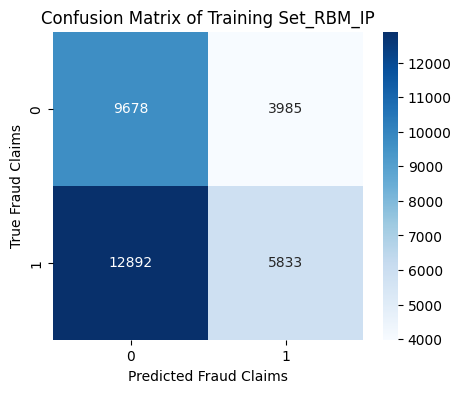

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


cm_train_IP = confusion_matrix(y_train_IP, y_train_IP_predict)
cm_test_IP = confusion_matrix(y_test_IP, y_test_IP_predict)

# For the training set
plt.figure(figsize=(5, 4))
sns.heatmap(cm_train_IP, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix of Training Set_RBM_IP')
plt.xlabel('Predicted Fraud Claims')
plt.ylabel('True Fraud Claims')
plt.show()

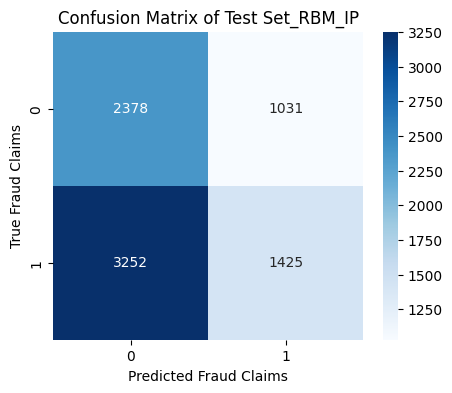

In [ ]:
# For the test set
plt.figure(figsize=(5, 4))
sns.heatmap(cm_test_IP, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix of Test Set_RBM_IP')
plt.xlabel('Predicted Fraud Claims')
plt.ylabel('True Fraud Claims')
plt.show()

###8.1.2 RBM_OP

In [ ]:
class RuleBasedModel_OP:
  def __init__(self):
    pass

  def fit(self, X, y = None):
    pass

  def transform(self, X, y = None):
    predictions = [self.apply_rules(row) for _, row in X.iterrows()] # transform
    result_df = pd.DataFrame({'Prediction': predictions})
    return result_df

  def apply_rules(self, X, y = None):
    return 1 if self.is_fraud(X) else 0

  def is_fraud(self, X, y = None):
    return X['InscClaimAmtReimbursed'] > 200 # set rule for outpatient

  def predict(self, X, y = None):
    return self.transform(X)


In [ ]:
OP_train_raw[['InscClaimAmtReimbursed']].describe()

# InscClaimAmtReimbursed
# count	424035.000000
# mean	284.899501
# std	681.694965
# min	0.000000
# 25%	40.000000
# 50%	80.000000
# 75%	200.000000
# max	102500.000000
#-----mode------median 80 -----mean 284----

,InscClaimAmtReimbursed
count,424035.000000
mean,284.899501
std,681.694965
min,0.000000
25%,40.000000
50%,80.000000
75%,200.000000
max,102500.000000


In [ ]:
model_rbm_op = Pipeline([
    ('transformer_op', Transformer_OP(IP_train_raw, OP_train_raw)),
    ('rule_based_model_op', RuleBasedModel_OP())
])

model_rbm_op = model_rbm_op.fit(OP_train_raw, y_train_OP)
model_rbm_op

Pipeline(steps=[('transformer_op',
                 <__main__.Transformer_OP object at 0x7b0fbe89fdf0>),
                ('rule_based_model_op',
                 <__main__.RuleBasedModel_OP object at 0x7b0fbe89c760>)])

In [ ]:
y_train_OP_predict = model_rbm_op.predict(OP_train_raw)
y_test_OP_predict = model_rbm_op.predict(OP_test_raw)

In [ ]:
# y_train_OP_predict.shape # (413106, 1)
# y_train_OP.shape # (413106,)

# y_test_OP_predict.shape # (104631, 1)
# y_test_OP.shape # (104631, )

In [ ]:

print(f'accuracy score of training set_OP: {accuracy_score(y_train_OP, y_train_OP_predict):.3f}')
print(f'accuracy score of test set_OP: {accuracy_score(y_test_OP, y_test_OP_predict):.3f}')

# Accuracy score of training set_OP: 0.615
# Accuracy score of test set_OP: 0.617

print(f'classification report of training set_OP: {classification_report(y_train_OP, y_train_OP_predict)}')
print(f'classification report of test set_OP: {classification_report(y_test_OP, y_test_OP_predict)}')

# classification report of training set_OP:
#                 precision    recall  f1-score   support
#            0       0.63      0.93      0.75    261803
#            1       0.36      0.07      0.12    151303

# classification report of test set_OP:
#                 precision    recall  f1-score   support
#            0       0.64      0.93      0.75     66540
#            1       0.37      0.07      0.12     38091

In [ ]:
cm_train_OP = confusion_matrix(y_train_OP, y_train_OP_predict)
cm_test_OP = confusion_matrix(y_test_OP, y_test_OP_predict)

plt.figure(figsize = (5,4))
sns.heatmap(cm_train_OP, annot = True, fmt = 'd', cmap = 'Blues')
plt.title('Confusion Matrix of Training Set_RBM_OP')
plt.xlabel('Predicted Fraud Claims')
plt.ylabel('True Fraud Claims')
plt.show()

In [ ]:
plt.figure(figsize = (5,4))
sns.heatmap(cm_test_OP, annot = True, fmt = 'd', cmap = 'Blues')
plt.title('Confusion Matrix of Test Set_RBM_OP')
plt.xlabel('Predicted Fraud Claims')
plt.ylabel('True Fraud Claims')
plt.show()

##8.2 Logistic regression

###8.2.1 LR_IP

In [ ]:
model_lr_ip = Pipeline([
    ('transformer_ip',Transformer_IP(IP_train_raw, OP_train_raw)),
    ('min_max_scaler',MinMaxScaler()),
    ('lr',LogisticRegression(max_iter=1000))
])

model_lr_ip = model_lr_ip.fit(IP_train_raw, y_train_IP)
model_lr_ip

Pipeline(steps=[('transformer_ip',
                 <__main__.Transformer_IP object at 0x7b7588e1cb80>),
                ('min_max_scaler', MinMaxScaler()),
                ('lr', LogisticRegression(max_iter=1000))])

In [ ]:
# # check which step generate dataset with missing data

# transformed_data = model_lr.named_steps['transformer_ip'].transform(IP_test_raw)
# scaled_data = model_lr.named_steps['min_max_scaler'].transform(transformed_data)
# y_test_IP_predict = model_lr.named_steps['lr'].predict(scaled_data)
# transformed_data[transformed_data['ClaimID_provider'].isnull()]

In [ ]:
y_train_IP_predict = model_lr_ip.predict(IP_train_raw)
y_test_IP_predict = model_lr_ip.predict(IP_test_raw)

In [ ]:
print(f'{accuracy_score(y_train_IP, y_train_IP_predict):.2f}') # 0.79   # without ClaimID_provider: 0.628
print(f'{accuracy_score(y_test_IP, y_test_IP_predict):.2f}') # 0.78     # without ClaimID_provider: 0.621

print(classification_report(y_train_IP, y_train_IP_predict))
          #     precision    recall  f1-score   support

          #  0       0.72      0.82      0.76     13663
          #  1       0.85      0.76      0.80     18725
print(classification_report(y_test_IP, y_test_IP_predict))
          #     precision    recall  f1-score   support

          #  0       0.71      0.82      0.76      3409
          #  1       0.85      0.76      0.80      4677

0.70
0.67
              precision    recall  f1-score   support

           0       0.66      0.53      0.59       201
           1       0.72      0.81      0.76       292

    accuracy                           0.70       493
   macro avg       0.69      0.67      0.68       493
weighted avg       0.69      0.70      0.69       493

              precision    recall  f1-score   support

           0       0.58      0.87      0.70       367
           1       0.84      0.52      0.64       480

    accuracy                           0.67       847
   macro avg       0.71      0.69      0.67       847
weighted avg       0.73      0.67      0.66       847



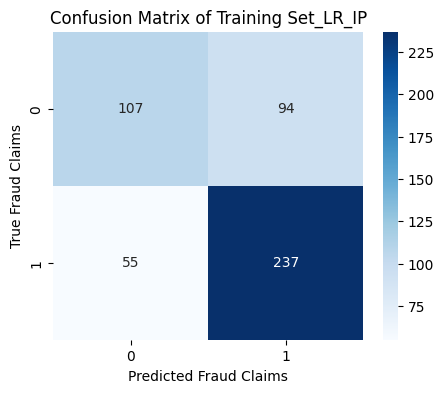

In [ ]:
cm_train_IP = confusion_matrix(y_train_IP, y_train_IP_predict)
cm_test_IP = confusion_matrix(y_test_IP, y_test_IP_predict)

# For the training set
plt.figure(figsize=(5, 4))
sns.heatmap(cm_train_IP, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix of Training Set_LR_IP')
plt.xlabel('Predicted Fraud Claims')
plt.ylabel('True Fraud Claims')
plt.show()

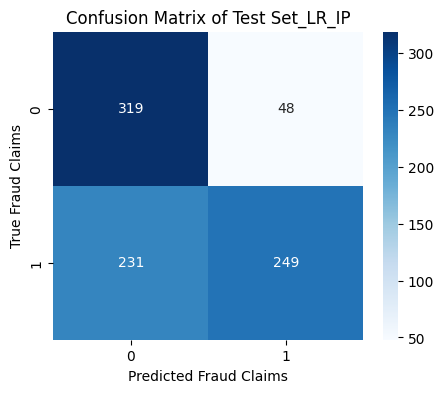

In [ ]:
# For the test set
plt.figure(figsize=(5, 4))
sns.heatmap(cm_test_IP, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix of Test Set_LR_IP')
plt.xlabel('Predicted Fraud Claims')
plt.ylabel('True Fraud Claims')
plt.show()

In [ ]:
y_train_IP_proba = model_lr_ip.predict_proba(IP_train_raw)
y_test_IP_proba = model_lr_ip.predict_proba(IP_test_raw)

In [ ]:
y_train_IP_proba.shape # (32388, 2)
y_test_IP_proba.shape # (8086, 2)

y_train_IP.shape # (32388,)
y_test_IP.shape # (8086,)

(847,)

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.


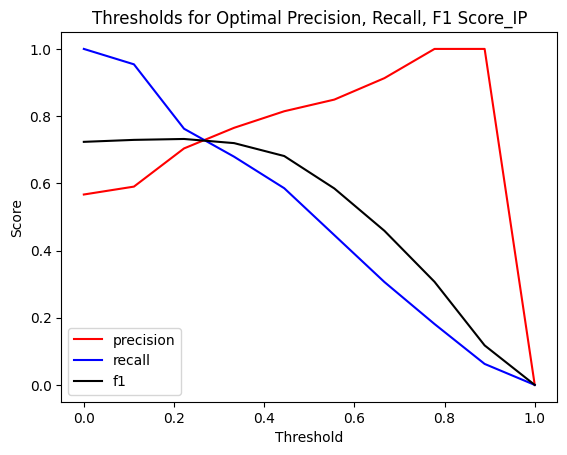

In [ ]:
import numpy as np


thresholds = np.linspace(0, 1, 10)
precisions = []
recalls = []
f1s = []
ave = "binary"

for cut in thresholds:
    y_test_IP_predict = (y_test_IP_proba[:, 1] > cut).astype(int)
    precisions.append(precision_score(y_test_IP, y_test_IP_predict, average=ave))
    recalls.append(recall_score(y_test_IP, y_test_IP_predict, average=ave))
    f1s.append(f1_score(y_test_IP, y_test_IP_predict, average=ave))

plt.title('Thresholds for Optimal Precision, Recall, F1 Score_IP')
plt.plot(thresholds, precisions, color="red", label="precision")
plt.plot(thresholds, recalls, color="blue", label="recall")
plt.plot(thresholds, f1s, color="black", label="f1")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

# threshold: 0.4

In [ ]:
# !pip install shap
import shap

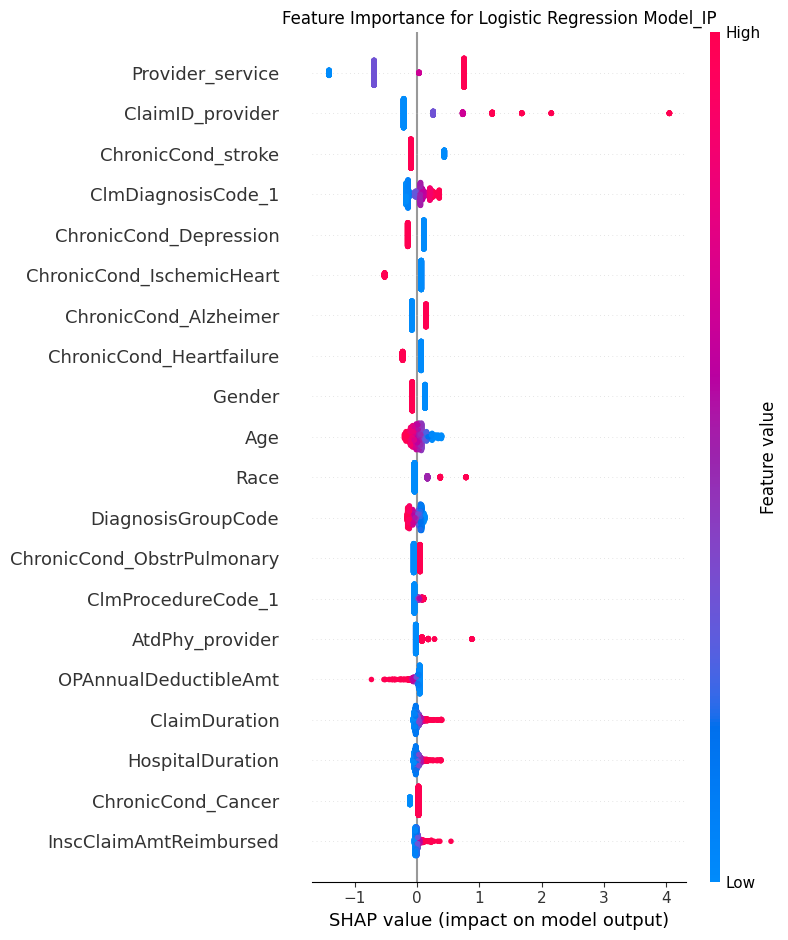

In [ ]:
transformed_data = model_lr.named_steps['transformer_ip'].transform(IP_test_raw) # transformed_data is df
scaled_data = model_lr.named_steps['min_max_scaler'].transform(transformed_data) # scaled_data is numpy.ndarray

explainer = shap.Explainer(model_lr.named_steps['lr'], scaled_data) # I cannot use KernelExplainer method: don't know why
                                                                    # I cannot use TreeExplainer method: TreeExplainer is for tree based models: e.g. random forest, gradient boost
                                                                    # I can only use Explainer method

shap_values = explainer.shap_values(scaled_data) # shap_values is numpy.ndarray


train_features = transformed_data.columns.to_list() # note: extract features from df transformed_data
plt.title('Feature Importance for Logistic Regression Model_IP')
shap.summary_plot(shap_values, scaled_data, feature_names=train_features)

###8.2.2 LR_OP

In [36]:
model_lr_op = Pipeline([
    ('transformer_op',Transformer_OP(IP_train_raw, OP_train_raw)),
    ('min_max_scaler',MinMaxScaler()),
    ('lr',LogisticRegression(max_iter=1000))
])

model_lr_op = model_lr_op.fit(OP_train_raw, y_train_OP)

In [ ]:
y_train_OP_predict = model_lr_op.predict(OP_train_raw)
y_test_OP_predict = model_lr_op.predict(OP_test_raw)

In [ ]:
print(f'{accuracy_score(y_train_OP, y_train_OP_predict):.3f}') # 0.854
print(f'{accuracy_score(y_test_OP, y_test_OP_predict):.3f}') # 0.856

print(classification_report(y_train_OP, y_train_OP_predict))
          #     precision    recall  f1-score   support

          #  0       0.85      0.94      0.89    261803
          #  1       0.86      0.71      0.78    151303
print(classification_report(y_test_OP, y_test_OP_predict))
          #     precision    recall  f1-score   support

          #  0       0.85      0.94      0.89     66540
          #  1       0.87      0.71      0.78     38091

In [ ]:
cm_train_OP = confusion_matrix(y_train_OP, y_train_OP_predict)
cm_test_OP = confusion_matrix(y_test_OP, y_test_OP_predict)

# For the training set
plt.figure(figsize=(5, 4))
sns.heatmap(cm_train_OP, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix of Training Set_LR_OP')
plt.xlabel('Predicted Fraud Claims')
plt.ylabel('True Fraud Claims')
plt.show()

In [ ]:
# For the test set
plt.figure(figsize=(5, 4))
sns.heatmap(cm_test_OP, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix of Test Set_LR_OP')
plt.xlabel('Predicted Fraud Claims')
plt.ylabel('True Fraud Claims')
plt.show()

In [ ]:
y_train_OP_proba = model_lr_op.predict_proba(OP_train_raw)
y_test_OP_proba = model_lr_op.predict_proba(OP_test_raw)

In [ ]:
thresholds = np.linspace(0, 1, 10)
precisions = []
recalls = []
f1s = []
ave = "binary"

for cut in thresholds:
    y_test_OP_predict = (y_test_OP_proba[:, 1] > cut).astype(int)
    precisions.append(precision_score(y_test_OP, y_test_OP_predict, average=ave))
    recalls.append(recall_score(y_test_OP, y_test_OP_predict, average=ave))
    f1s.append(f1_score(y_test_OP, y_test_OP_predict, average=ave))

plt.title('Thresholds for Optimal Precision, Recall, F1 Score_OP')
plt.plot(thresholds, precisions, color="red", label="precision")
plt.plot(thresholds, recalls, color="blue", label="recall")
plt.plot(thresholds, f1s, color="black", label="f1")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

# threshold: 0.4?

In [ ]:
# transformed_data = model_lr.named_steps['transformer_op'].transform(OP_test_raw) # transformed_data is df
# scaled_data = model_lr.named_steps['min_max_scaler'].transform(transformed_data) # scaled_data is numpy.ndarray

# explainer = shap.Explainer(model_lr.named_steps['lr'], scaled_data) # I cannot use KernelExplainer method: don't know why
#                                                                     # I cannot use TreeExplainer method: TreeExplainer is for tree based models: e.g. random forest, gradient boost
#                                                                     # I can only use Explainer method

# shap_values = explainer.shap_values(scaled_data) # shap_values is numpy.ndarray


# train_features = transformed_data.columns.to_list() # note: extract features from df transformed_data
# plt.title('Feature Importance for Logistic Regression Model_OP')
# shap.summary_plot(shap_values, scaled_data, feature_names=train_features)

##8.3 Random forest

###8.3.1 RF_IP

In [ ]:
model_rf_ip = Pipeline([
    ('transformer_ip', Transformer_IP(IP_train_raw, OP_train_raw)),
    ('rf', RandomForestClassifier(max_depth=5))
])

model_rf_ip = model_rf_ip.fit(IP_train_raw, y_train_IP)

y_train_IP_predict = model_rf_ip.predict(IP_train_raw)
y_test_IP_predict = model_rf_ip.predict(IP_test_raw)

In [ ]:
print(f'{accuracy_score(y_train_IP, y_train_IP_predict):.2f}') # 0.80
print(f'{accuracy_score(y_test_IP, y_test_IP_predict):.2f}') # 0.79

print(f'{classification_report(y_train_IP, y_train_IP_predict)}')
          #     precision    recall  f1-score   support
          #  0       0.75      0.78      0.76     13663
          #  1       0.83      0.81      0.82     18725
print(f'{classification_report(y_test_IP, y_test_IP_predict)}')
          #     precision    recall  f1-score   support
          #  0       0.73      0.78      0.76      3409
          #  1       0.83      0.79      0.81      4677

0.89
0.65
              precision    recall  f1-score   support

           0       0.88      0.85      0.86       201
           1       0.90      0.92      0.91       292

    accuracy                           0.89       493
   macro avg       0.89      0.88      0.88       493
weighted avg       0.89      0.89      0.89       493

              precision    recall  f1-score   support

           0       0.58      0.71      0.63       367
           1       0.73      0.60      0.66       480

    accuracy                           0.65       847
   macro avg       0.65      0.65      0.65       847
weighted avg       0.66      0.65      0.65       847



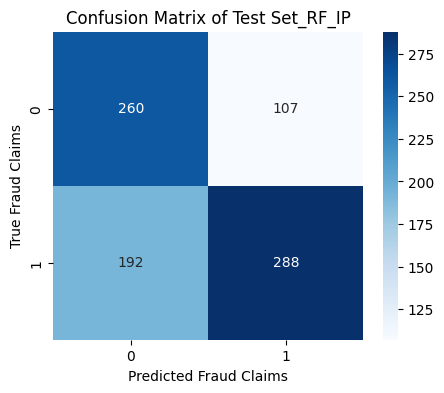

In [ ]:
cm_train_IP = confusion_matrix(y_train_IP, y_train_IP_predict)
cm_test_IP = confusion_matrix(y_test_IP, y_test_IP_predict)

# For the training set
plt.figure(figsize=(5, 4))
sns.heatmap(cm_test_IP, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix of Test Set_RF_IP')
plt.xlabel('Predicted Fraud Claims')
plt.ylabel('True Fraud Claims')
plt.show()

 99%|===================| 15985/16172 [01:23<00:00]       

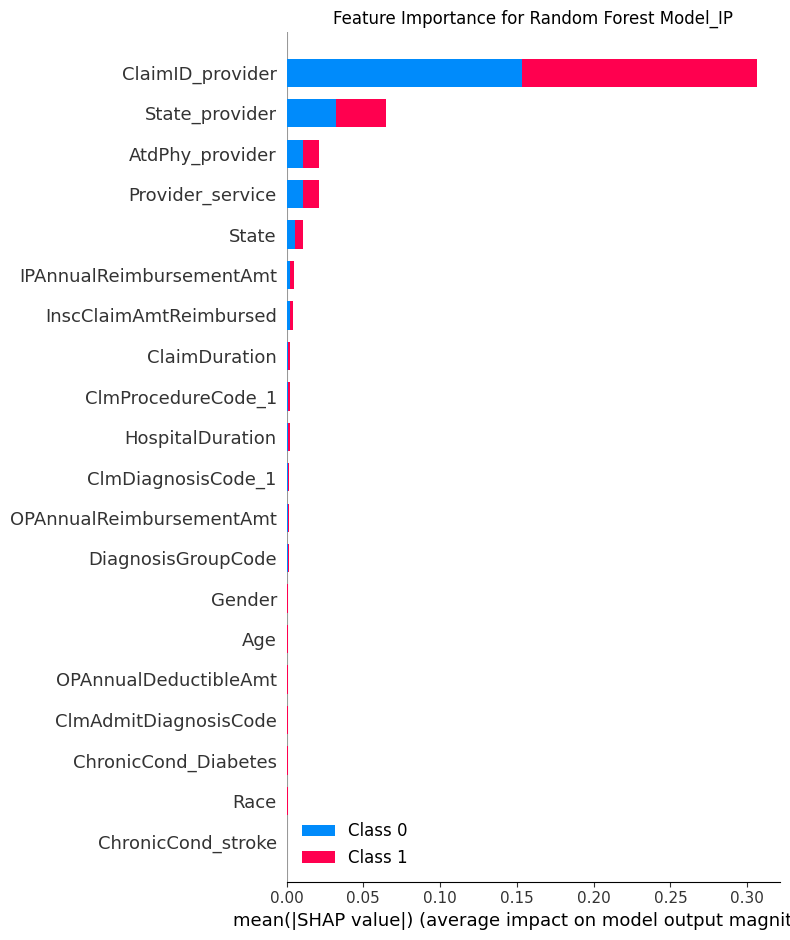

In [ ]:
# transformed_data = model_rf.named_steps['transformer_ip'].transform(IP_test_raw) # transformed_data is df
# # no need to scale data when applying random forest

# explainer = shap.TreeExplainer(model_rf.named_steps['rf'], transformed_data) # I cannot use KernelExplainer method: don't know why
#                                                                     # I cannot use TreeExplainer method: TreeExplainer is for tree based models: e.g. random forest, gradient boost
#                                                                     # I can only use Explainer method

# shap_values = explainer.shap_values(transformed_data) # shap_values is numpy.ndarray


# train_features = transformed_data.columns.to_list() # note: extract features from df transformed_data
# plt.title('Feature Importance for Random Forest Model_IP')
# shap.summary_plot(shap_values, transformed_data, feature_names=train_features)

###8.3.2 RF_OP

In [ ]:
from sklearn.pipeline import Pipeline

model_rf_op = Pipeline([
    ('transformer_op', Transformer_OP(IP_train_raw, OP_train_raw)),
    ('rf', RandomForestClassifier())
])

model_rf_op = model_rf_op.fit(OP_train_raw, y_train_OP) # long executing time: 4m 23s
                                                        # how long? time function
y_train_OP_predict = model_rf_op.predict(OP_train_raw)
y_test_OP_predict = model_rf_op.predict(OP_test_raw)

In [ ]:
print(f'{accuracy_score(y_train_OP, y_train_OP_predict):.3f}') # 1.000
print(f'{accuracy_score(y_test_OP, y_test_OP_predict):.3f}') # 0.984

print(f'{classification_report(y_train_OP, y_train_OP_predict)}')
          #     precision    recall  f1-score   support
          #  0       1.00      1.00      1.00    261803
          #  1       1.00      1.00      1.00    151303

print(f'{classification_report(y_test_OP, y_test_OP_predict)}')
          #     precision    recall  f1-score   support
          #  0       0.98      1.00      0.99     66540
          #  1       1.00      0.96      0.98     38091

In [ ]:
cm_train_OP = confusion_matrix(y_train_OP, y_train_OP_predict)
cm_test_OP = confusion_matrix(y_test_OP, y_test_OP_predict)

sns.heatmap(cm_test_OP, annot= True, fmt = 'd', cmap='Blues')
plt.title('Confusion Matrix of Test Set_RF_OP')
plt.xlabel('Predicted Fraud Claims')
plt.ylabel('True Fraud Claims')
plt.show()

In [ ]:
# # no success

# transformed_data = model_rf.named_steps['transformer_op'].transform(OP_test_raw) # transformed_data is df
# # no need to scale data when applying random forest
# transformed_data = transformed_data.head()

# explainer = shap.TreeExplainer(model_rf.named_steps['rf'], transformed_data) # I cannot use KernelExplainer method: don't know why
#                                                                     # I cannot use TreeExplainer method: TreeExplainer is for tree based models: e.g. random forest, gradient boost
#                                                                     # I can only use Explainer method

# shap_values = explainer.shap_values(transformed_data) # shap_values is numpy.ndarray


# train_features = transformed_data.columns.to_list() # note: extract features from df transformed_data
# plt.title('Feature Importance for Random Forest Model_OP')
# shap.summary_plot(shap_values, transformed_data, feature_names=train_features)

##8.4 Gradient boost

###8.4.1 GB_IP

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

model_gb_ip = Pipeline([
    ('transformer_ip', Transformer_IP(IP_train_raw, OP_train_raw)),
    ('gbc', GradientBoostingClassifier())
])

model_gb_ip = model_gb_ip.fit(IP_train_raw, y_train_IP)
model_gb_ip

Pipeline(steps=[('transformer_ip',
                 <__main__.Transformer_IP object at 0x7cca5018ccd0>),
                ('gbc', GradientBoostingClassifier())])

In [ ]:
y_train_IP_predict = model_gb_ip.predict(IP_train_raw)
y_test_IP_predict = model_gb_ip.predict(IP_test_raw)

In [ ]:
print(f'{accuracy_score(y_train_IP, y_train_IP_predict):.2f}') # 0.87
print(f'{accuracy_score(y_test_IP, y_test_IP_predict):.2f}') # 0.87

print(classification_report(y_train_IP, y_train_IP_predict))
          #     precision    recall  f1-score   support
          #  0       0.82      0.87      0.85     13663
          #  1       0.90      0.86      0.88     18725
print(classification_report(y_test_IP, y_test_IP_predict))
          #     precision    recall  f1-score   support
          #  0       0.82      0.87      0.85      3409
          #  1       0.90      0.86      0.88      4677

0.87
0.87
              precision    recall  f1-score   support

           0       0.82      0.87      0.85     13663
           1       0.90      0.86      0.88     18725

    accuracy                           0.87     32388
   macro avg       0.86      0.87      0.86     32388
weighted avg       0.87      0.87      0.87     32388

              precision    recall  f1-score   support

           0       0.82      0.87      0.85      3409
           1       0.90      0.86      0.88      4677

    accuracy                           0.87      8086
   macro avg       0.86      0.87      0.86      8086
weighted avg       0.87      0.87      0.87      8086



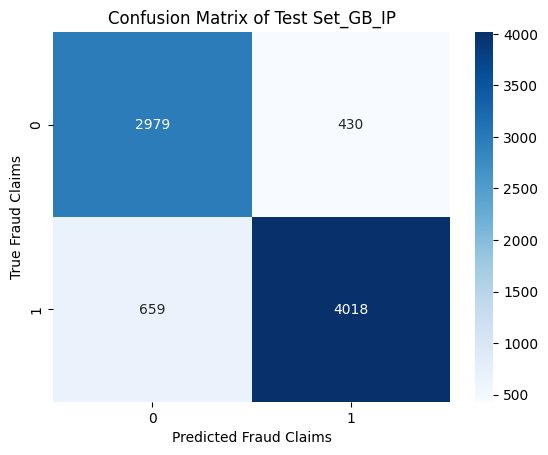

In [ ]:
cm_train_IP = confusion_matrix(y_train_IP, y_train_IP_predict)
cm_test_IP = confusion_matrix(y_test_IP, y_test_IP_predict)

sns.heatmap(cm_test_IP, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix of Test Set_GB_IP')
plt.xlabel('Predicted Fraud Claims')
plt.ylabel('True Fraud Claims')
plt.show()

In [ ]:
# transformed_data = model_gb.named_steps['transformer_ip'].transform(IP_test_raw) # transformed_data is df
# # no need to scale data when applying random forest

# explainer = shap.TreeExplainer(model_gb.named_steps['gbc'], transformed_data) # I cannot use KernelExplainer method: don't know why
#                                                                     # I cannot use TreeExplainer method: TreeExplainer is for tree based models: e.g. random forest, gradient boost
#                                                                     # I can only use Explainer method

# shap_values = explainer.shap_values(transformed_data) # shap_values is numpy.ndarray


# train_features = transformed_data.columns.to_list() # note: extract features from df transformed_data
# plt.title('Feature Importance for Gradient Boosting Model_IP')
# shap.summary_plot(shap_values, transformed_data, feature_names=train_features)

###8.4.2 GB_OP

In [ ]:
model_gb_op = Pipeline([
    ('transformer_op', Transformer_OP(IP_train_raw, OP_train_raw)),
    ('gbc',GradientBoostingClassifier())
])

model_gb_op = model_gb_op.fit(OP_train_raw, y_train_OP)
model_gb_op

In [ ]:
y_train_OP_predict = model_gb_op.predict(OP_train_raw)
y_test_OP_predict = model_gb_op.predict(OP_test_raw)

In [ ]:
print(f'{accuracy_score(y_train_OP, y_train_OP_predict):.3f}') # 0.920
print(f'{accuracy_score(y_test_OP, y_test_OP_predict):.3f}') # 0.920

print(classification_report(y_train_OP, y_train_OP_predict))
          #     precision    recall  f1-score   support
          #  0       0.90      0.99      0.94    261803
          #  1       0.98      0.80      0.88    151303
print(classification_report(y_test_OP, y_test_OP_predict))
          #     precision    recall  f1-score   support
          #  0       0.90      0.99      0.94     66540
          #  1       0.97      0.80      0.88     38091

In [ ]:
cm_train_OP = confusion_matrix(y_train_OP, y_train_OP_predict)
cm_test_OP = confusion_matrix(y_test_OP, y_test_OP_predict)

sns.heatmap(cm_test_OP, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix of Test Set_GB_OP')
plt.xlabel('Predicted Fraud Claims')
plt.ylabel('True Fraud Claims')
plt.show()

In [ ]:
# transformed_data = model_gb.named_steps['transformer_op'].transform(OP_test_raw) # transformed_data is df
# # no need to scale data when applying random forest

# explainer = shap.TreeExplainer(model_gb.named_steps['gbc'], transformed_data) # I cannot use KernelExplainer method: don't know why
#                                                                     # I cannot use TreeExplainer method: TreeExplainer is for tree based models: e.g. random forest, gradient boost
#                                                                     # I can only use Explainer method

# shap_values = explainer.shap_values(transformed_data) # shap_values is numpy.ndarray


# train_features = transformed_data.columns.to_list() # note: extract features from df transformed_data
# plt.title('Feature Importance for Gradient Boosting Model_OP')
# shap.summary_plot(shap_values, transformed_data, feature_names=train_features)

#9.F1 score change overtime
* split your data into training and testing sets in a progressive manner and train/predict with different models at each step.

##9.0 Import modules

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

!pip install shap
import shap

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import pandas as pd

##9.1 F1 score change overtime_IP

In [ ]:
# Define your models
pipelines = [model_rbm_ip, model_lr_ip, model_rf_ip, model_gb_ip]

# Initiate DataSplitter
data_splitter = DataSplitter(merged_df_IP)

# Number of splits
num_splits = 52  # Adjust based on your requirement


# split data, transform y, fit, predict, generate dictionary of F1 score
for i in range(1, num_splits + 1):
  # Extract train and test sets
  train_start = 1
  train_end = i
  test_start = i + 1
  test_end = i + 1

  # split train and test data
  IP_train_raw = data_splitter.extract_train_ip(train_start = train_start, train_end = train_end)
  IP_test_raw = data_splitter.extract_test_ip(test_start = test_start, test_end = test_end)

  # convert y based on train and test data
  y_train_IP = IP_train_raw['PotentialFraud'].map(potential_fraud2num)
  y_test_IP = IP_test_raw['PotentialFraud'].map(potential_fraud2num)

  print(f'train_start: {train_start}, train_end: {train_end}, test_start: {test_start}, test_end: {test_end}')

  f1_dict = {'Candidate model': [], 'F1 score':[]}
  for pipeline_num, pipeline in enumerate(pipelines, start=1):
    model = pipeline.fit(IP_train_raw, y_train_IP)
    y_test_IP_predict = model.predict(IP_test_raw)
    f1 = f1_score(y_test_IP, y_test_IP_predict)
    f1_dict['Candidate model'].append(pipeline_num)
    f1_dict['F1 score'].append(f1)

  print(pd.DataFrame(f1_dict))

  print('=========================================')



train_start: 1, train_end: 1, test_start: 2, test_end: 2
   Candidate model  F1 score
0                1  0.413978
1                2  0.640927
2                3  0.628571
3                4  0.622951
train_start: 1, train_end: 2, test_start: 3, test_end: 3
   Candidate model  F1 score
0                1  0.423803
1                2  0.701398
2                3  0.733333
3                4  0.722433
train_start: 1, train_end: 3, test_start: 4, test_end: 4
   Candidate model  F1 score
0                1  0.408797
1                2  0.727273
2                3  0.728285
3                4  0.744344
train_start: 1, train_end: 4, test_start: 5, test_end: 5
   Candidate model  F1 score
0                1  0.413605
1                2  0.798226
2                3  0.798226
3                4  0.810750
train_start: 1, train_end: 5, test_start: 6, test_end: 6
   Candidate model  F1 score
0                1  0.376812
1                2  0.790698
2                3  0.800000
3                4 

##9.2 F1 score change overtime_OP

In [ ]:
# # Define a dictionary of valid diagnosis and multiple procedure code pairs
# valid_code_pairs = {
#             "A123": ["P456", "P789", "P999"],
#             "B456": ["P234", "P567"],
#         }

In [ ]:
# Define your models
pipelines = [
    model_rbm_op,
    # model_lr_op,
    # model_rf_op,
    # model_gb_op
    ]

# Initiate DataSplitter
data_splitter = DataSplitter(merged_df_OP)

# Number of splits
num_splits = 364  # Adjust based on your requirement


# split data, transform y, fit, predict, generate dictionary of F1 score
for i in range(1, num_splits + 1):
  # Extract train and test sets
  train_start = 1
  train_end = i
  test_start = i + 1
  test_end = i + 1

  # split train and test data
  OP_train_raw = data_splitter.extract_train_op(train_start = train_start, train_end = train_end)
  OP_test_raw = data_splitter.extract_test_op(test_start = test_start, test_end = test_end)

  # convert y based on train and test data
  y_train_OP = OP_train_raw['PotentialFraud'].map(potential_fraud2num)
  y_test_OP = OP_test_raw['PotentialFraud'].map(potential_fraud2num)

  print(f'train_start: {train_start}, train_end: {train_end}, test_start: {test_start}, test_end: {test_end}')

  f1_dict = {'Candidate model': [], 'F1 score':[]}
  for pipeline_num, pipeline in enumerate(pipelines, start=1):
    model = pipeline.fit(OP_train_raw, y_train_OP)
    y_test_OP_predict = model.predict(OP_test_raw)
    f1 = f1_score(y_test_OP, y_test_OP_predict)
    f1_dict['Candidate model'].append(pipeline_num)
    f1_dict['F1 score'].append(f1)

  print(pd.DataFrame(f1_dict))

  print('=========================================')



train_start: 1, train_end: 1, test_start: 2, test_end: 2
   Candidate model  F1 score
0                1  0.229358
train_start: 1, train_end: 2, test_start: 3, test_end: 3
   Candidate model  F1 score
0                1  0.261294
train_start: 1, train_end: 3, test_start: 4, test_end: 4
   Candidate model  F1 score
0                1  0.300866
train_start: 1, train_end: 4, test_start: 5, test_end: 5
   Candidate model  F1 score
0                1  0.262557
train_start: 1, train_end: 5, test_start: 6, test_end: 6
   Candidate model  F1 score
0                1  0.293538
train_start: 1, train_end: 6, test_start: 7, test_end: 7
   Candidate model  F1 score
0                1  0.294314
train_start: 1, train_end: 7, test_start: 8, test_end: 8
   Candidate model  F1 score
0                1  0.290168
train_start: 1, train_end: 8, test_start: 9, test_end: 9
   Candidate model  F1 score
0                1  0.233735
train_start: 1, train_end: 9, test_start: 10, test_end: 10
   Candidate model  F